<a href="https://colab.research.google.com/github/annsandra98/Data-Analytics/blob/master/iris_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [0]:
df=pd.read_csv('Iris.csv')

#Replace Species type with numbers
df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)



In [0]:
#Initialize Gaussian Naive Bayes
clf = GaussianNB()



In [0]:
# Split-out validation dataset
array = df.values
X = array[:,1:5]
Y = array[:,5]



In [0]:
# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [0]:
# Test options and evaluation metric
scoring = 'accuracy'

In [0]:
clf.fit(X_train, Y_train) 



GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#Predicting for the Test Set
pred_clf = clf.predict(X_validation)


In [47]:
confusion_matrix( Y_validation,pred_clf)

array([[14,  0,  0],
       [ 0, 15,  3],
       [ 0,  2, 16]])

In [0]:

#Prediction Probability
prob_pos_clf = clf.predict_proba(X_validation)[:, 1]



In [0]:
#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf_df = pd.DataFrame(pred_clf.reshape(50,1))


In [0]:
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)



In [0]:
#reshaping the test dataset
X_validation_df = pd.DataFrame(X_validation.reshape(50,4))



In [0]:
#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_validation_df, pred_clf_df], axis=1, join_axes=[X_validation_df.index])

pred_outcome.rename(columns = {0:'SepalLengthCm', 1:'SepalWidthCm', 2:'PetalLengthCm', 3:'PetalWidthCm'}, inplace=True)

del df['Id']

In [0]:
#merging the prediction with original dataset
pred_comp = pd.merge(df,pred_outcome, on=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])



In [63]:
#print top 10 lines of the final predictions
print((pred_comp).head(50))
print ("\n")



    SepalLengthCm  SepalWidthCm  ...  Species  Prediction
0             5.4           3.9  ...        1         1.0
1             4.9           3.1  ...        1         1.0
2             4.9           3.1  ...        1         1.0
3             4.9           3.1  ...        1         1.0
4             4.8           3.4  ...        1         1.0
5             5.1           3.5  ...        1         1.0
6             4.6           3.6  ...        1         1.0
7             5.2           3.4  ...        1         1.0
8             4.7           3.2  ...        1         1.0
9             5.2           4.1  ...        1         1.0
10            5.5           3.5  ...        1         1.0
11            5.0           3.5  ...        1         1.0
12            4.5           2.3  ...        1         1.0
13            4.8           3.0  ...        1         1.0
14            5.1           3.8  ...        1         1.0
15            5.0           3.3  ...        1         1.0
16            

In [0]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)



In [0]:
#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)



In [0]:
#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

NB accuracy: 0.970000 (0.045826)


In [0]:
import numpy as np 
  
def distance(p1, p2): 
    return np.sqrt(np.sum(np.power(p2-p1, 2))) #distance between two points 
p1 = np.array([1, 1])   #coordinate x = 1, y = 1 
p2 = np.array([4, 4])   #coordinate x = 4, y = 4 
distance(p1, p2) 

4.242640687119285

[[2 2]
 [3 2]]


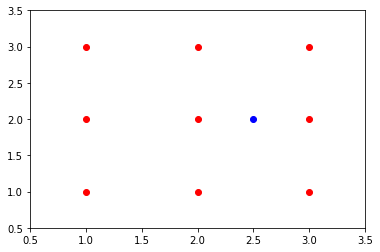

In [0]:
import numpy as np 
import random 
import scipy.stats as ss 
import matplotlib.pyplot as plt 
  
points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])   
   #points = existing points 
p = np.array([2.5, 2])   #p = point we wish to insert 
  
def majority_vote(votes): 
    vote_counts = {} 
    for vote in votes: 
        if vote in vote_counts: 
           vote_counts[vote]+= 1
        else: 
            vote_counts[vote]= 1
    winners = [] 
    max_count = max(vote_counts.values()) 
    for vote, count in vote_counts.items(): 
        if count == max_count: 
            winners.append(vote) 
    return random.choice(winners) #returns winner randomly if there are more than 1 winner 
  
#>>>votes =[1, 2, 3, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1, 2] 
#sample vote counts above 
# >>>vote_counts = majority_vote(votes) 
  
def majority_vote_short(votes): 
    mode, count = ss.mstats.mode(votes) 
    return mode 
  
def find_nearest_neighbours(p, points, k = 5):  #algorithm to find the nearest neighbours 
    distances = np.zeros(points.shape[0]) 
    for i in range(len(distances)): 
        distances[i]= distance(p, points[i]) 
    ind = np.argsort(distances)      #returns index, according to sorted values in array 
    return ind[:k] 
  
ind = find_nearest_neighbours(p, points, 2);print(points[ind]) 
 #gives the nearest neighbour's for this sample case 
  
plt.plot(points[:, 0], points[:, 1], "ro") 
plt.plot(p[0], p[1], "bo") 
plt.axis([0.5, 3.5, 0.5, 3.5]) 
plt.show() 

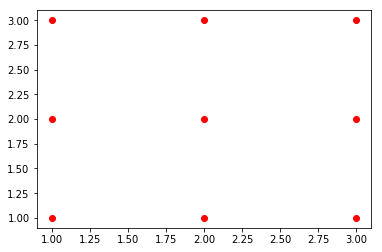

In [0]:

import numpy as np 
import random 
import scipy.stats as ss 
import matplotlib.pyplot as plt 
  
''' add the functions and libraries from previous programmes '''
  
def knn_predict(p, points, outcomes, k = 5): 
    ind = find_nearest_neighbours(p, points, k) 
    return majority_vote(outcomes[ind]) 
  
outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]) 
knn_predict(np.array([2.5, 2.7]), points, outcomes, k = 2) 
  
def generate_synth_data(n = 50): 
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0) 
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n))) 
    return (points, outcomes) 
  
n = 20
plt.figure() 
plt.plot(points[:n, 0], points[:n, 1], "ro") 
plt.plot(points[n:, 0], points[n:, 1], "bo") 
plt.show() 

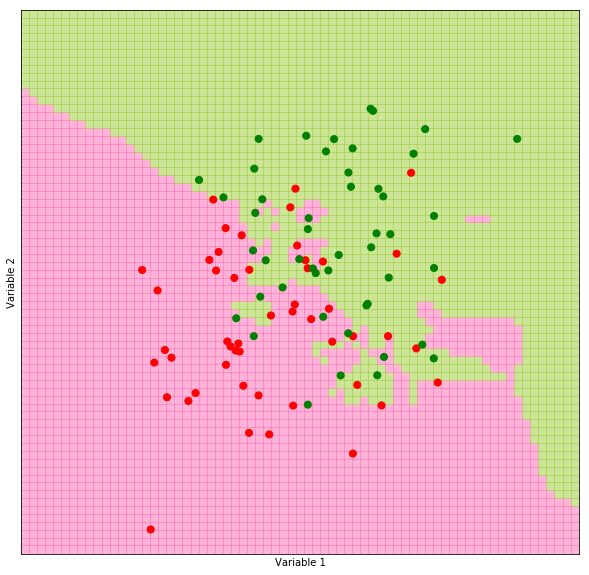

In [0]:
import numpy as np 
import random 
import scipy.stats as ss 
import matplotlib.pyplot as plt 
  
def make_prediction_grid(predictors, outcomes, limits, h, k): 
    (x_min, x_max, y_min, y_max) = limits 
    xs = np.arange(x_min, x_max, h) 
    ys = np.arange(y_min, y_max, h) 
    xx, yy = np.meshgrid(xs, ys) 
  
    prediction_grid = np.zeros(xx.shape, dtype = int) 
    for i, x in enumerate(xs): 
        for j, y in enumerate(ys): 
            p = np.array([x, y]) 
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k) 
    return (xx, yy, prediction_grid) 
  
def plot_prediction_grid (xx, yy, prediction_grid, filename): 
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap 
    background_colormap = ListedColormap (["hotpink", "lightskyblue", "yellowgreen"]) 
    observation_colormap = ListedColormap (["red", "blue", "green"]) 
    plt.figure(figsize =(10, 10)) 
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5) 
    plt.scatter(predictors[:, 0], predictors [:, 1], c = outcomes, cmap = observation_colormap, s = 50) 
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2') 
    plt.xticks(()); plt.yticks(()) 
    plt.xlim (np.min(xx), np.max(xx)) 
    plt.ylim (np.min(yy), np.max(yy)) 
    plt.savefig(filename) 
  
(predictors, outcomes) = generate_synth_data() 
# >>>predictors.shape 
# >>>outcomes.shape 
k = 5; filename ="knn_synth_5.pdf"; limits =(-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k) 
plot_prediction_grid(xx, yy, prediction_grid, filename) 
plt.show() 

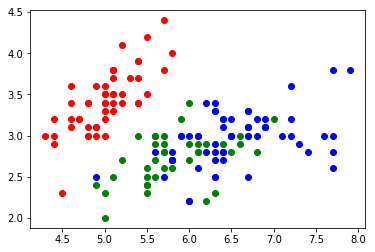

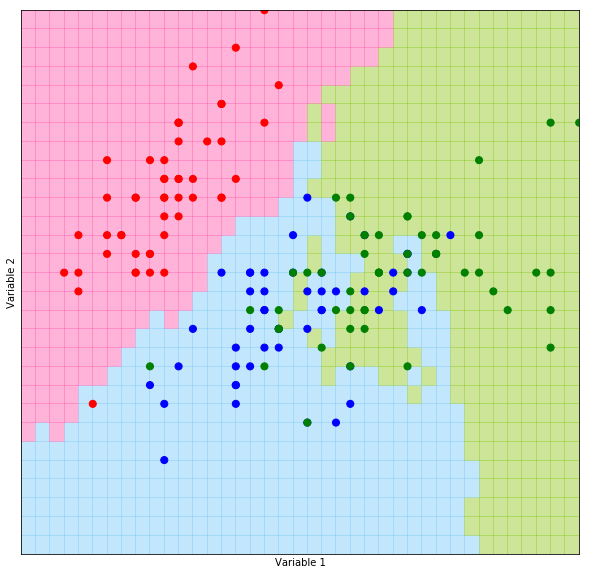

 prediction by scikit learn : 
83.33333333333334
 prediction by own model : 
84.66666666666667


In [0]:
from sklearn import datasets 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
   
iris = datasets.load_iris() 
    # >>>iris["data"] 
predictors = iris.data[:, 0:2] 
outcomes = iris.target 
  
plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro") 
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go") 
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo") 
  
k = 5; filename ="iris_grid.pdf"; limits =(4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k) 
plot_prediction_grid(xx, yy, prediction_grid, filename) 
plt.show() 
  
from sklearn.neighbors import KNeighborsClassifier #predictions from skikit 
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(predictors, outcomes) 
sk_predictions = knn.predict(predictors) 
  
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors]) 
  
   # >>>sk_predictions == my_predictions 
   # >>>np.mean(sk_predictions == my_predictions) 
print(" prediction by scikit learn : ") 
print(100 * np.mean(sk_predictions == outcomes)) 
print(" prediction by own model : ") 
print(100 * np.mean(my_predictions == outcomes))     
 # our homemade predicter is actually somewhat better 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('Iris.csv')

In [41]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [42]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [43]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)


In [59]:
confusion_matrix(outcomes,sk_predictions)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

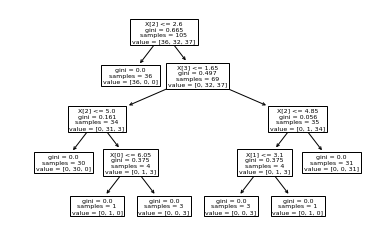

In [55]:
 from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)
predict=dtc.predict(test_inputs)
tree.plot_tree(dtc.fit(train_inputs, train_classes)) 


In [54]:
confusion_matrix( test_classes,predict)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

## **Since ROC is only for binary classification, it cannot be used here as iris has three classes**